In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sks
from sklearn.metrics import classification_report
import seaborn as sns


In [0]:
df = pd.read_csv("conversion_data.csv")

In [0]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [0]:
df.age = df.age.apply(lambda x : 80 if x > 80 else x)

In [0]:
df.isnull().any()

country                False
age                    False
new_user               False
source                 False
total_pages_visited    False
converted              False
dtype: bool

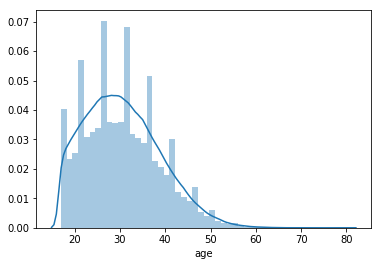

In [0]:
sns.distplot(df.age)

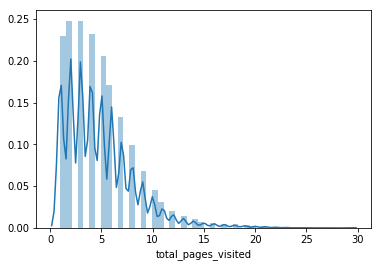

In [0]:
sns.distplot(df.total_pages_visited)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


ValueError: ignored

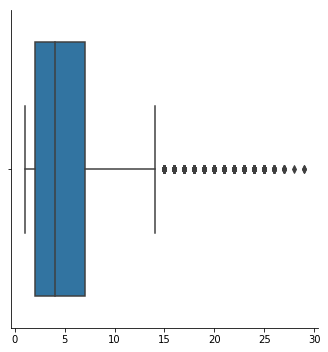

In [0]:
sns.catplot(df.total_pages_visited,kind="box",data = df)

Int64Index([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 72, 73, 77, 79, 80],
           dtype='int64', name='age')


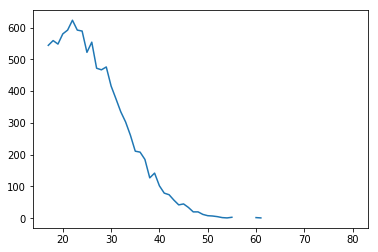

In [0]:
match_by_age = df[["age","converted"]].groupby(["age","converted"]).size().unstack()

print(match_by_age.index)

#plt.plot(match_by_age[0])
plt.plot(match_by_age[1])
plt.show()


In [0]:
by_country = df.groupby(by="country").sum()

In [0]:
by_country.head()

,age,new_user,total_pages_visited,converted
country,,,,
China,2349611,53508,348809,102
Germany,397512,8842,67770,816
UK,1475346,32938,246231,2550
US,5443646,121456,878022,6732


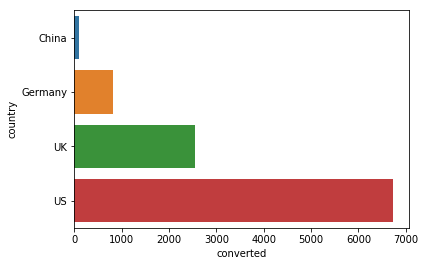

In [0]:
#plt.plot( by_country.converted)
sns.barplot(by_country.converted,by_country.index)

In [0]:
by_source = df.groupby(by="source").sum()

In [0]:
by_source

,age,new_user,total_pages_visited,converted
source,,,,
Ads,2709622,60849,434785,3060
Direct,2213733,49742,348840,2040
Seo,4742760,106153,757207,5100


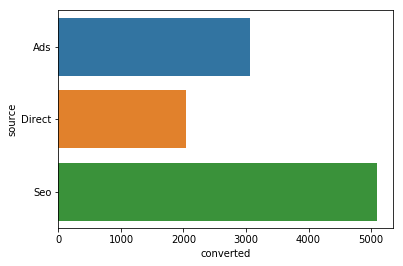

In [0]:

sns.barplot(by_source.converted,by_source.index)

In [0]:
df.converted.mean()

0.03225806451612903

In [0]:
df = pd.get_dummies(df)

In [0]:
from sklearn.feature_selection import chi2

In [0]:
X = df.drop("converted", axis = 1)
y = df.converted

In [0]:
X.sample()

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
32728,25,1,1,0,0,0,1,0,0,1


In [0]:
X.isnull().any()

age                    False
new_user               False
total_pages_visited    False
country_China          False
country_Germany        False
country_UK             False
country_US             False
source_Ads             False
source_Direct          False
source_Seo             False
dtype: bool

In [0]:
chi2 = chi2(X,y)
chi2

(array([5.59996289e+03, 2.30914908e+03, 2.02697509e+05, 2.34695073e+03,
        3.82500000e+02, 6.44210526e+02, 1.75257732e+02, 1.40689655e+01,
        3.87887324e+01, 2.01315789e+00]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        3.55366590e-085, 4.05710472e-142, 5.25926285e-040, 1.76227698e-004,
        4.72245974e-010, 1.55940432e-001]))

In [0]:
df_selec = pd.DataFrame(chi2,
				   index=["chi2-score","p-value"], columns = df.drop("converted", axis = 1).columns)
df_selec = df_selec.T.sort_values(by="chi2-score",ascending = False)

In [0]:
df_selec

,chi2-score,p-value
total_pages_visited,202697.509485,0.000000e+00
age,5599.962893,0.000000e+00
country_China,2346.950732,0.000000e+00
new_user,2309.149077,0.000000e+00
country_UK,644.210526,4.057105e-142
country_Germany,382.500000,3.553666e-85
country_US,175.257732,5.259263e-40
source_Direct,38.788732,4.722460e-10
source_Ads,14.068966,1.762277e-04
source_Seo,2.013158,1.559404e-01


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split  (X, y, test_size=0.3, stratify = y, random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()

sc_x_fit = sc_x.fit(X_train)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)

In [0]:
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression() # on définit le modèle de régression logistique à appliquer aux données

logisticreg.fit(X_train, y_train) # estimation du modèle
logisticreg.score(X_test, y_test) # la précision du modèle

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.986021505376344

In [0]:
y_pred = logisticreg.predict(X_test) # predictions du modèle


In [0]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) # on calcule la matrice de confusion

In [0]:
import seaborn as sns

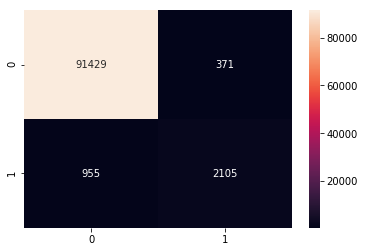

In [0]:
sns.heatmap(cm, annot = True, fmt="d")

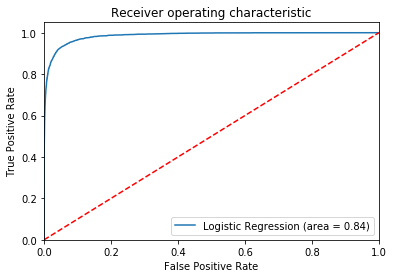

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logisticreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [0]:
print("Rapport pour le modèle log :",
      classification_report(y_test,y_pred) ,sep="\n")

Rapport pour le modèle log :
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91800
           1       0.85      0.69      0.76      3060

    accuracy                           0.99     94860
   macro avg       0.92      0.84      0.88     94860
weighted avg       0.99      0.99      0.99     94860



In [0]:
''' k fold cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

# le code ci-dessous permet de générer les 10 séparation train/test pour
# la 10-folds cross-validation
for train_index, test_index in kf.split(X_train):
      print("Train:", train_index, "Validation:",test_index)
      X_KF_train, X_KF_test = X_train[train_index], X_train[test_index]
      y_KF_train, y_KF_test = y_train[train_index], y_train[test_index]

# cette méthode permet d'obtenir rapidement des score de précisions
# pour e=les différents modèles estimés par cross-validation      
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
scores = cross_val_score(logisticreg, X, y, cv=10)
predictions = cross_val_predict(logisticreg, X, y, cv=10)'''

' k fold cross validation\nfrom sklearn.model_selection import KFold\nkf = KFold(n_splits=10)\n\n# le code ci-dessous permet de générer les 10 séparation train/test pour\n# la 10-folds cross-validation\nfor train_index, test_index in kf.split(X_train):\n      print("Train:", train_index, "Validation:",test_index)\n      X_KF_train, X_KF_test = X_train[train_index], X_train[test_index]\n      y_KF_train, y_KF_test = y_train[train_index], y_train[test_index]\n\n# cette méthode permet d\'obtenir rapidement des score de précisions\n# pour e=les différents modèles estimés par cross-validation      \nfrom sklearn.cross_validation import cross_val_score, cross_val_predict\nfrom sklearn import metrics\nscores = cross_val_score(logisticreg, X, y, cv=10)\npredictions = cross_val_predict(logisticreg, X, y, cv=10)'

In [0]:
from imblearn.combine import SMOTEENN
comb_echant=SMOTEENN()

#%%
# on applique la méthode fit_sample() sur nos données
X_comb, y_comb= comb_echant.fit_sample(X_train, y_train)
# on le transforme en Series pour avoir un affichage plus agréable
pd.Series(y_comb).value_counts()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


0    205867
1    198942
dtype: int64

In [0]:
logisticreg.fit(X_comb, y_comb) # estimation du modèle
logisticreg.score(X_comb, y_comb) # la précision du modèle

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9632765081804011

In [0]:
y_pred = logisticreg.predict(X_test) # predictions du modèle
cm = metrics.confusion_matrix(y_test, y_pred) # on calcule la matrice de confusion

In [0]:
logisticreg.intercept_

array([-5.50855736])

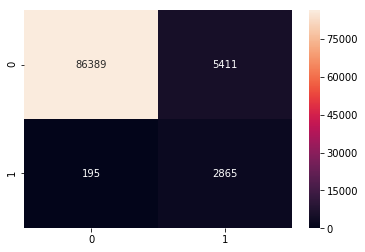

In [0]:
sns.heatmap(cm, annot = True, fmt="d")

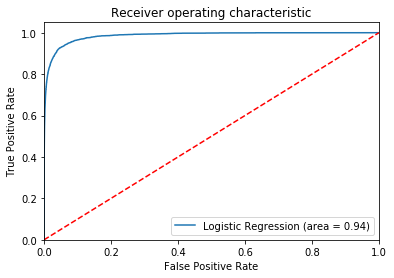

In [0]:
logit_roc_auc = roc_auc_score(y_test, logisticreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [0]:
print("Rapport pour le modèle log SMOOT :",
      classification_report(y_test,y_pred) ,sep="\n")

Rapport pour le modèle log SMOOT :
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     91800
           1       0.35      0.94      0.51      3060

    accuracy                           0.94     94860
   macro avg       0.67      0.94      0.74     94860
weighted avg       0.98      0.94      0.95     94860



In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(n_estimators=200, max_depth=4,random_state=0)

In [0]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

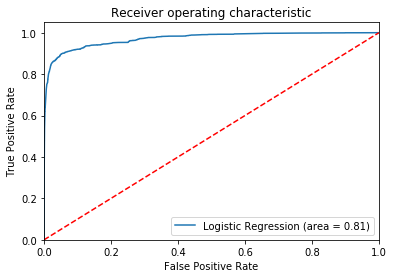

In [0]:
logit_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [0]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[20,50,100,200], 'max_depth':[ 3,4, 5,8,10]}
rf_grid = GridSearchCV(rf, parameters, cv=5)
rf_grid.fit(X_comb, y_comb)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_dep

In [0]:
#rf.fit(X_comb, y_comb)

In [0]:
rf_grid.best_params_

{'max_depth': 8, 'n_estimators': 50}

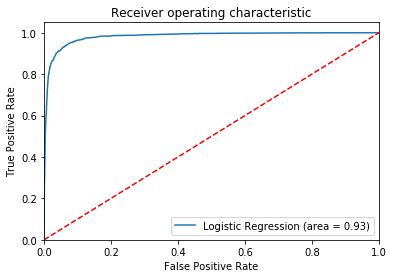

In [0]:
logit_roc_auc = roc_auc_score(y_test, rf_grid.best_estimator_.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_grid.best_estimator_.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [0]:
from sklearn.svm import SVC
#clf = SVC(gamma="scale",probability=True)
#clf.fit(X_train, y_train) 


In [0]:
'''logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()'''

In [0]:
from sklearn.svm import SVC
#clf = SVC(gamma='scale',probability=True)
#clf.fit(X_comb, y_comb) 

In [0]:
'''logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()'''